In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt
import simpy
import scipy
from collections import deque
from scipy import stats

loc_lambda = 2
loc_mu = 3
loc_n_servers = 5
loc_ro = loc_lambda/(loc_mu*loc_n_servers)


def customer_arrivals(env, theater):
    """Create new *moviegoers* until the sim time reaches 120."""
    while True:
        yield env.timeout(random.expovariate(1 / 0.5))

        #movie = random.choice(theater.movies)
        num_tickets = random.randint(1, 6)




queue = deque(np.zeros(2))
for i in range(loc_n_servers):
    queue.append(i)
    print(queue.popleft())
    
print(queue)
    
    
"""
λ – the arrival rate into the system as a whole.
μ – the capacity of each of n equal servers.
ρ represents the system load. In a single server system, it will be: ρ=λ/μ
In a multi-server system (one queue with n equal servers, each with capacity μ), it will be
ρ=λ/(nμ)
"""

0.0
0.0
0
1
2
deque([3, 4])


'\nλ – the arrival rate into the system as a whole.\nμ – the capacity of each of n equal servers.\nρ represents the system load. In a single server system, it will be: ρ=λ/μ\nIn a multi-server system (one queue with n equal servers, each with capacity μ), it will be\nρ=λ/(nμ)\n'

In [94]:

import random

import simpy
import numpy as np


#RANDOM_SEED = 42
NEW_CUSTOMERS = 10  # Total number of customers
INTERVAL_CUSTOMERS_start =5.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience
Banktime = 5.0
glo_waiting =[]
glo_verbose =False


def source(env, number, interval, counter):
    """Source generates customers randomly"""
    #queuecount= 0
    for i in range(number):
        
        #queuecount+= len(counter.queue)
        c = customer(env, 'Customer%02d' % i, counter, time_in_bank=Banktime)
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)
    #print(queuecount)

def customer(env, name, counter, time_in_bank):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    if glo_verbose ==True:
        print('%7.4f %s: Here I am' % (arrive, name))

    with counter.request() as req:
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)

        wait = env.now - arrive

        glo_waiting.append(wait)

        if req in results:
            # We got to the counter
            if glo_verbose ==True:
                print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
            tib = random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
                
            if glo_verbose ==True:
                print('%7.4f %s: Finished' % (env.now, name))

        else:
            # We reneged
            
            if glo_verbose ==True:
                print('%7.4f %s: RENEGED after %6.3f' % (env.now, name, wait))


# Setup and start the simulation
print('Bank renege')
#random.seed(RANDOM_SEED)
repeats = 100
service_range = 4
dim=2
avg_waiting_times_col = np.zeros((repeats,service_range,dim))
for j in range(repeats):
    
    avg_waiting_times  = np.zeros((service_range,dim))
    for i in range(1,service_range+1):
        INTERVAL_CUSTOMERS = INTERVAL_CUSTOMERS_start*i

        glo_waiting = []
        env = simpy.Environment()
        # Start processes and run
        counter = simpy.Resource(env, capacity=1)
        env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
        env.run()
        avg_waiting_times[i-1][0] = np.mean(glo_waiting)
        
        
        
        INTERVAL_CUSTOMERS = INTERVAL_CUSTOMERS_start

        glo_waiting = []
        env = simpy.Environment()
        # Start processes and run
        #print(counter.count)
        #print(counter.queue)
        counter = simpy.Resource(env, capacity=i)
        env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
        env.run()
        avg_waiting_times[i-1][1] = np.mean(glo_waiting)
    avg_waiting_times_col[j] = avg_waiting_times
    


Bank renege


In [95]:
np.mean(avg_waiting_times_col,axis=0).T

array([[0.88367273, 0.53316327, 0.44807881, 0.2994841 ],
       [0.89898756, 0.32637559, 0.08261409, 0.01600595]])

In [96]:

mean_area_estimate_ss = np.mean(avg_waiting_times_col,axis=0).T[0]
mean_area_estimate_mc = np.mean(avg_waiting_times_col,axis=0).T[1]

#Standard deviation of area estimation
std_area_estimate_ss = np.std(avg_waiting_times_col,axis=0).T[0]
std_area_estimate_mc = np.std(avg_waiting_times_col,axis=0).T[1]

#Variance of area estimation
var_area_estimate_ss = np.var(avg_waiting_times_col,axis=0).T[0]
var_area_estimate_mc = np.var(avg_waiting_times_col,axis=0).T[1]

#Welch's T test created from the slides in the lectures
welch_t =abs(mean_area_estimate_ss- mean_area_estimate_mc)/np.sqrt(var_area_estimate_ss/repeats + var_area_estimate_mc/repeats)
val_1 = np.power(var_area_estimate_ss/repeats + var_area_estimate_mc/repeats,2)
val_2 = np.power(var_area_estimate_ss/repeats,2)/(repeats-1) + np.power(var_area_estimate_mc/repeats,2)/(repeats-1)
welch_df = np.divide(val_1,val_2)
welch_critical_value = [scipy.stats.t.ppf(q=1-.05,df=loc_welch_df) for loc_welch_df in welch_df]

#formatting array
x_axis = np.int_(np.arange(int(service_range)) +1)

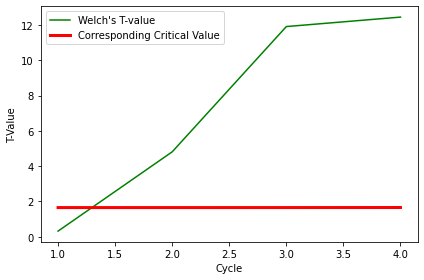

In [97]:

fig, ax = plt.subplots(1)
plt.plot(np.int_(x_axis),welch_t,"g-",label ="Welch's T-value")
plt.plot(np.int_(x_axis),welch_critical_value,"r-",linewidth=3,label ="Corresponding Critical Value")
#plt.title("Welch's T-test", y=-0.2)
plt.ylabel("T-Value")
plt.xlabel("Cycle")
plt.legend()
plt.tight_layout()
fig.savefig('welch_t_test_noTitle.png', dpi=300)
plt.show()